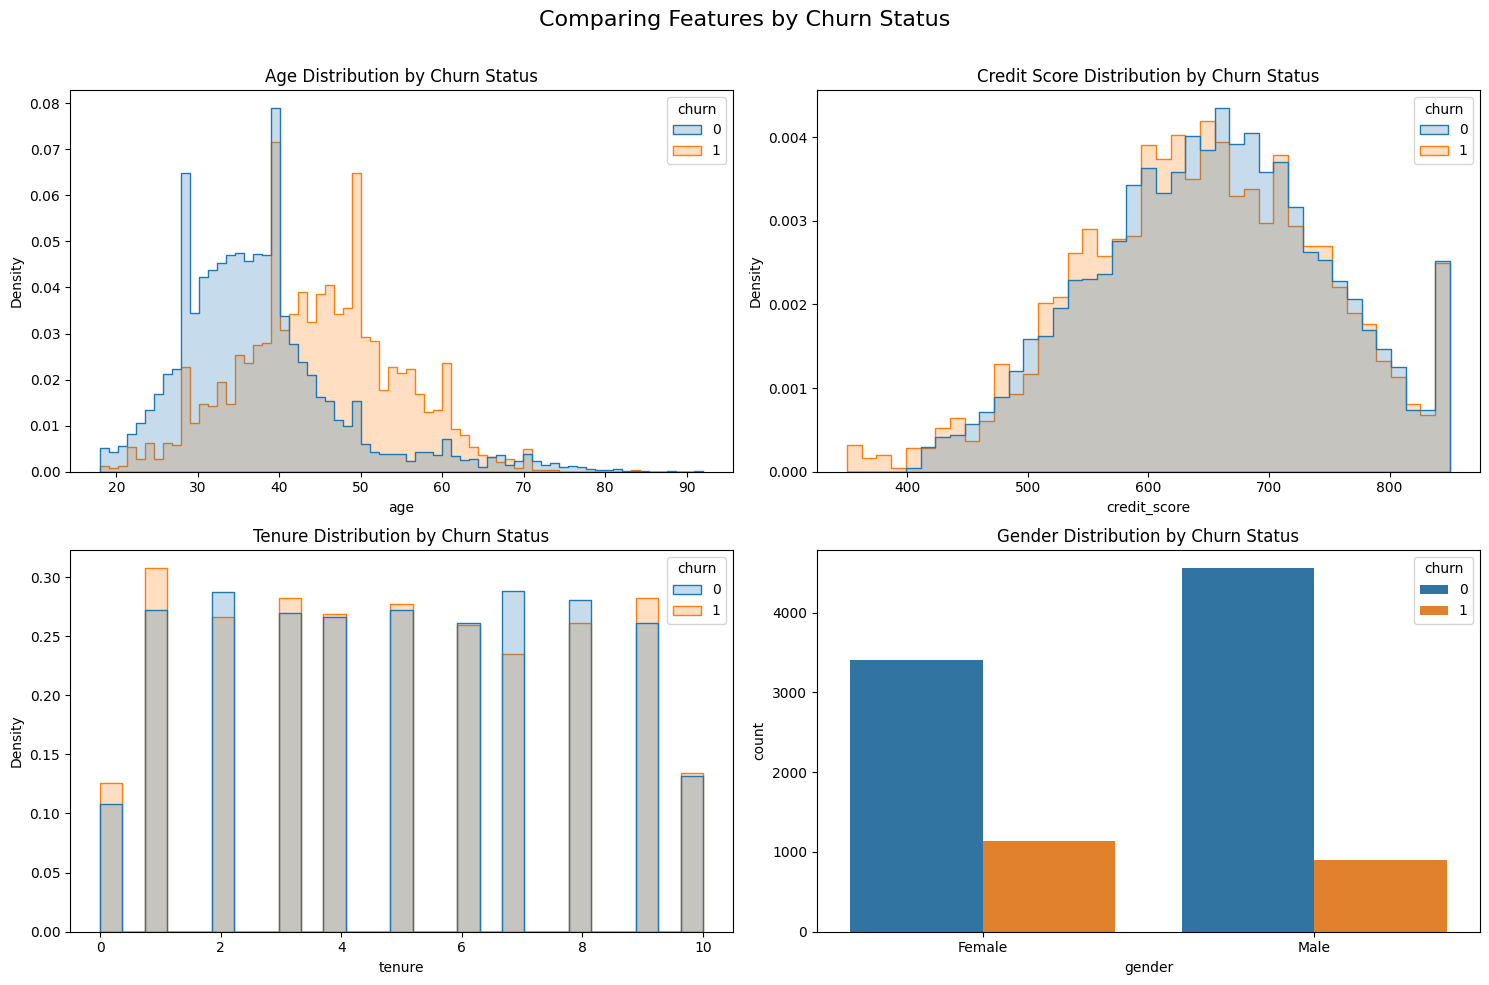

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv("Bank.csv")


fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparing Features by Churn Status', fontsize=16)


sns.histplot(df, x='age', hue='churn', element='step', stat='density', common_norm=False, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution by Churn Status')


sns.histplot(df, x='credit_score', hue='churn', element='step', stat='density', common_norm=False, ax=axs[0, 1])
axs[0, 1].set_title('Credit Score Distribution by Churn Status')


sns.histplot(df, x='tenure', hue='churn', element='step', stat='density', common_norm=False, ax=axs[1, 0])
axs[1, 0].set_title('Tenure Distribution by Churn Status')


sns.countplot(data=df, x='gender', hue='churn', ax=axs[1, 1])
axs[1, 1].set_title('Gender Distribution by Churn Status')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()



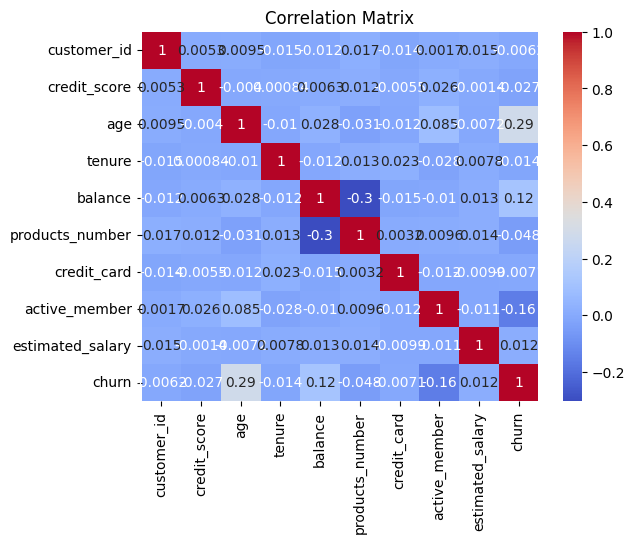

In [29]:

correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



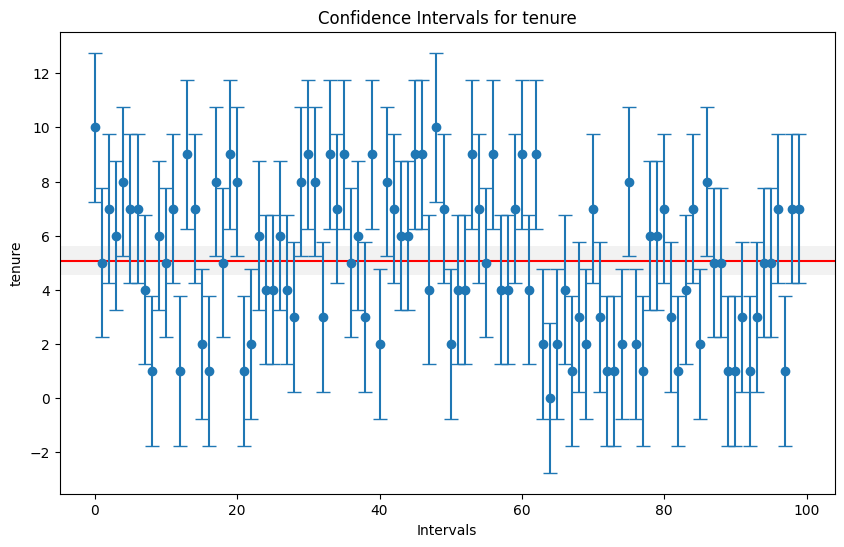


T-statistic for tenure: 0.24360465990643412
P-value for tenure: 0.8080411007034272
Critical t-values range: (-1.9842169515086827, 1.9842169515086827)
The t-statistic for tenure is inside the range of critical t-values, suggesting failure to reject the null hypothesis.



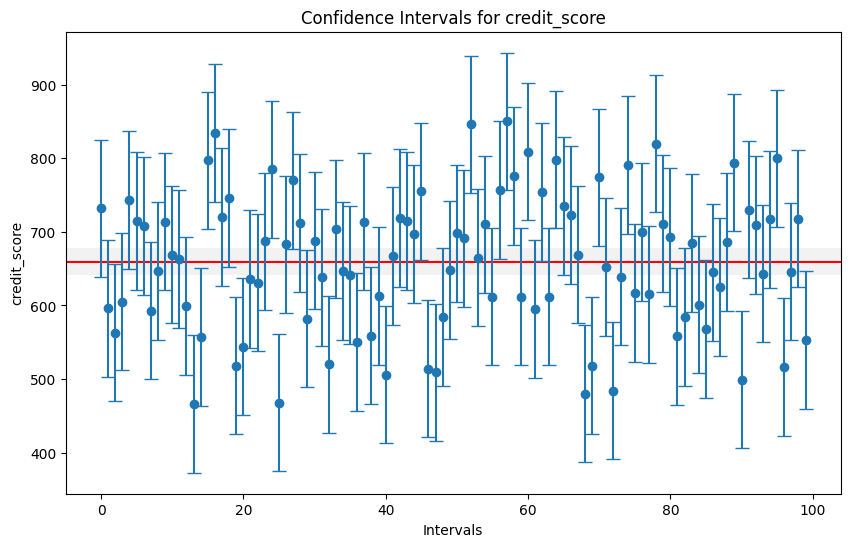


T-statistic for credit_score: 0.9645897464540762
P-value for credit_score: 0.33710066431560715
Critical t-values range: (-1.9842169515086827, 1.9842169515086827)
The t-statistic for credit_score is inside the range of critical t-values, suggesting failure to reject the null hypothesis.



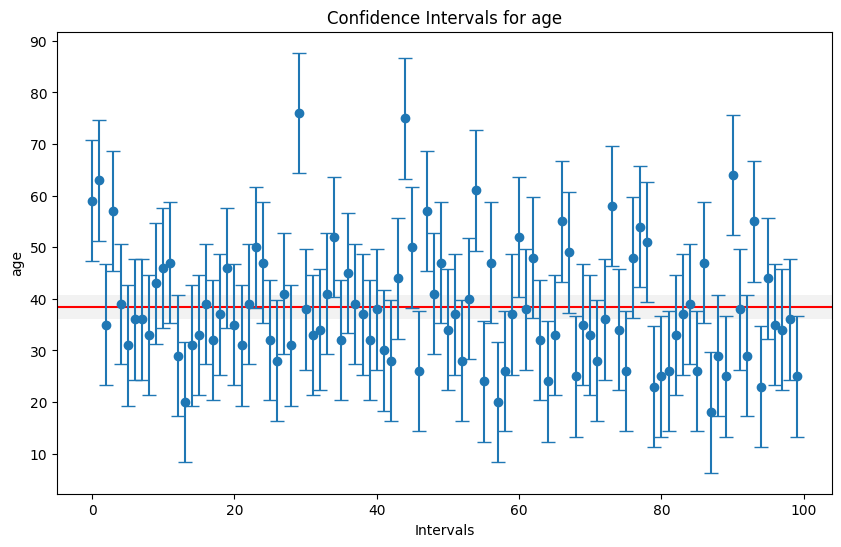


T-statistic for age: -0.40335740758072225
P-value for age: 0.6875551548487969
Critical t-values range: (-1.9842169515086827, 1.9842169515086827)
The t-statistic for age is inside the range of critical t-values, suggesting failure to reject the null hypothesis.



In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Bank.csv")

def generate_ci_graph(df, column_name):
    sample_data = df.sample(100)  
    
    mean = sample_data[column_name].mean()
    sigma = sample_data[column_name].std()
    conf_interval = stats.norm.interval(0.95, loc=mean, scale=sigma/np.sqrt(len(sample_data)))

    
    plt.figure(figsize=(10,6))
    plt.title(f"Confidence Intervals for {column_name}")
    plt.axhline(y=mean, color='red', linestyle='-')  # Mean line
    plt.errorbar(range(len(sample_data)), sample_data[column_name], yerr=sigma, fmt='o', capsize=5)
    plt.axhspan(conf_interval[0], conf_interval[1], facecolor='gray', alpha=0.1)
    plt.ylabel(column_name)
    plt.xlabel("Intervals")
    plt.show()

   
    t_stat, p_val = stats.ttest_1samp(sample_data[column_name], df[column_name].mean())
    
    
    alpha = 0.05
    dfree = len(sample_data) - 1 
    t_critical = stats.t.ppf(1 - alpha/2, df=dfree)

    return t_stat, p_val, -t_critical, t_critical  

columns_to_plot = ['tenure', 'credit_score', 'age']

for column in columns_to_plot:
    t_stat, p_val, t_critical_lower, t_critical_upper = generate_ci_graph(df, column)
    print(f"\nT-statistic for {column}: {t_stat}\nP-value for {column}: {p_val}")
    print(f"Critical t-values range: ({t_critical_lower}, {t_critical_upper})")
    if abs(t_stat) > t_critical_upper:
        print(f"The t-statistic for {column} is outside the range of critical t-values, suggesting rejection of the null hypothesis.\n")
    else:
        print(f"The t-statistic for {column} is inside the range of critical t-values, suggesting failure to reject the null hypothesis.\n")





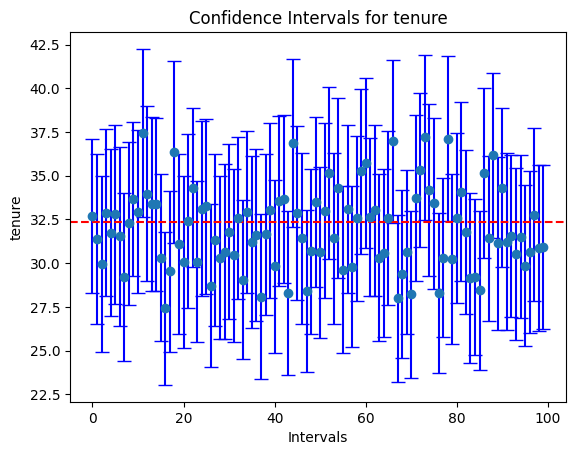

T-statistic for Confidence Intervals for tenure: -0.5980046140112711
P-value for Confidence Intervals for tenure: 0.5512024370301531


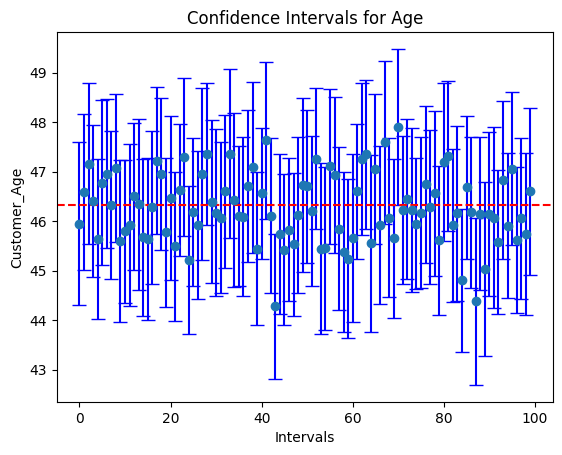

T-statistic for Confidence Intervals for Age: 0.31930648879966206
P-value for Confidence Intervals for Age: 0.7501668988100565


In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def generate_CI_and_plot(df, column_name, title):
    
    intervals = 100

    
    means = []
    lower_CIs = []
    upper_CIs = []

    for _ in range(intervals):
        
        sample_data = df.sample(100)
        
       
        mean_value = sample_data[column_name].mean()
        sigma_value = sample_data[column_name].std()
        
        
        conf_interval = stats.norm.interval(0.95, loc=mean_value, scale=sigma_value/np.sqrt(len(sample_data)))
        
        means.append(mean_value)
        lower_CIs.append(conf_interval[0])
        upper_CIs.append(conf_interval[1])

   
    plt.figure()
    plt.errorbar(range(intervals), means, yerr=[means - np.array(lower_CIs), np.array(upper_CIs) - means], fmt='o', ecolor='blue', capsize=5)
    plt.axhline(y=df[column_name].mean(), color='red', linestyle='--', label='Population Mean')
    plt.xlabel('Intervals')
    plt.ylabel(column_name)
    plt.title(title)
    plt.show()

    
    t_stat, p_val = stats.ttest_1samp(sample_data[column_name], df[column_name].mean())
    print(f"T-statistic for {title}: {t_stat}\nP-value for {title}: {p_val}")
    return


df3 = pd.read_csv('tenure.csv')
df2 = pd.read_csv('BankChurners.csv')


generate_CI_and_plot(df3, 'tenure', 'Confidence Intervals for tenure')
generate_CI_and_plot(df2, 'Customer_Age', 'Confidence Intervals for Age')

